[2 4 1 3]


,open,high,low,close,volume
date,,,,,
2024-09-04 04:59:59.999,56653.99,56728.00,56559.15,56694.00,517.99161
2024-09-04 05:59:59.999,56694.00,56694.00,56201.00,56252.01,1520.48803
2024-09-04 06:59:59.999,56252.01,56530.01,56209.99,56277.00,2018.11039
2024-09-04 07:59:59.999,56277.00,56881.00,56253.00,56746.00,1513.51398
2024-09-04 08:59:59.999,56746.00,56909.94,56668.28,56783.01,740.01293


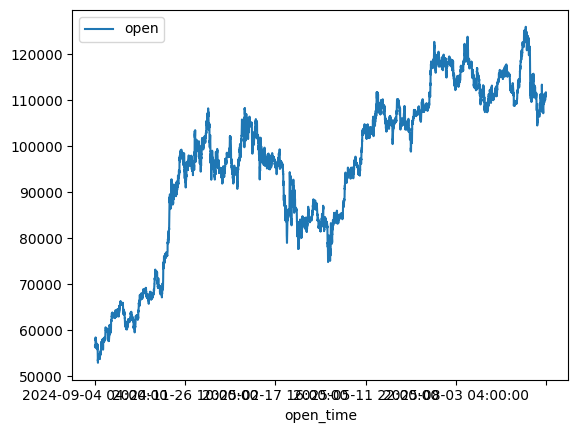

In [1]:
import pandas as pd
dfall = pd.read_csv('../3_Machine_Learning/dataset_export_1h.csv')
print(dfall['symbol_id'].unique())

df = dfall[dfall['symbol_id'] == 1]
df = df.sort_values('open_time')
df.plot(x='open_time', y='open');

df["date"] = pd.to_datetime(df["close_time"])
df = df.sort_values("date").reset_index(drop=True)
df = df.drop(['klines_id', 'symbol_id', 'interval_id', 'created_at'], axis=1)
df = df.drop(['open_time', 'close_time'], axis=1)
df = df.set_index('date')
df = df.sort_index()
df.head()

In [2]:
def add_simple_features(newdf):
    # Rendement instantané
    newdf["return"] = newdf["close"].pct_change()
    
    # Moyennes mobiles
    newdf["ma_fast"] = newdf["close"].rolling(window=5).mean()
    newdf["ma_slow"] = newdf["close"].rolling(window=20).mean()
    
    # Différence entre moyennes mobiles
    newdf["ma_diff"] = newdf["ma_fast"] - newdf["ma_slow"]
    
    # RSI simplifié
    delta = newdf["close"].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    rs = gain.rolling(14).mean() / loss.rolling(14).mean()
    newdf["rsi"] = 100 - (100 / (1 + rs))
    
    # Nettoyage des NaN
    newdf = newdf.dropna()
    return newdf

# Try with more features
#df = add_simple_features(df)
from ta import add_all_ta_features

df = add_all_ta_features(
    df,
    open="open", high="high", low="low", close="close", volume="volume",
    fillna=True
)
print("Dataframe with features:")
df.head()

/home/ubuntu/.venv/lib/python3.12/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


Dataframe with features:


,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
date,,,,,,,,,,,,,,,,,,,,,
2024-09-04 04:59:59.999,56653.99,56728.00,56559.15,56694.00,517.99161,309.383795,517.99161,0.597276,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56694.000000,0.000000,0.000000,0.000000
2024-09-04 05:59:59.999,56694.00,56694.00,56201.00,56252.01,1520.48803,-896.458821,-1002.49642,-0.439768,-672040.504380,-6.357497e+09,...,-0.062227,-0.012445,-0.049781,13.502937,2.700587,10.802349,56501.770408,-0.779606,-0.782661,-0.779606
2024-09-04 06:59:59.999,56252.01,56530.01,56209.99,56277.00,2018.11039,-2069.412176,1015.61397,-0.510136,-568830.063947,-1.228949e+09,...,-0.106806,-0.031318,-0.075489,25.995071,7.359484,18.635587,56404.159897,0.044425,0.044415,-0.735528
2024-09-04 07:59:59.999,56277.00,56881.00,56253.00,56746.00,1513.51398,-1206.612805,2529.12795,-0.216623,-386163.189581,8.174090e+09,...,-0.074418,-0.039938,-0.034480,28.823865,11.652360,17.171505,56549.070910,0.833378,0.829924,0.091720
2024-09-04 08:59:59.999,56746.00,56909.94,56668.28,56783.01,740.01293,-1243.971730,3269.14088,-0.197139,-327084.465564,7.253266e+09,...,-0.042986,-0.040547,-0.002439,24.240445,14.169977,10.070468,56648.522285,0.065220,0.065199,0.157001


In [3]:
#df["target"] = df["close"].shift(-1)
df["target"] = df["close"].shift(-5)
df = df.dropna()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import mlflow

# Variables explicatives et cible
#features = ["open", "high", "low", "close", "volume", "return", "ma_diff", "rsi"]
#X = df[features]
#y = df["target"]
X = df.drop('target', axis=1)
y = df['target']


# Split train/test sans mélanger les données temporelles
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Normalisation (important pour les modèles linéaires)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

with mlflow.start_run():
    # Dictionnaire des modèles à tester
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost" : XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective="reg:squarederror", random_state=42)
    }
    
    # Entraînement + score R²
    r2_scores = {}
    
    for name, model in models.items():      
        model.fit(X_train_scaled, y_train)
        mlflow.sklearn.log_model(sk_model=model, name=name)
        y_pred = model.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)
        r2_scores[name] = r2
        mlflow.log_metric("r2", r2)
        print(f"{name}: R² = {r2:.4f}")

# Choisir le meilleur modèle
best_model_name = max(r2_scores, key=r2_scores.get)
print(f"\n🏆 Best model: {best_model_name} (R² = {r2_scores[best_model_name]:.4f})")


2025/11/07 12:23:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression: R² = 0.9448


2025/11/07 12:25:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest: R² = 0.4922


2025/11/07 12:26:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting: R² = 0.8172


2025/11/07 12:26:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost: R² = 0.7272

🏆 Best model: Linear Regression (R² = 0.9448)


In [10]:
import requests
from datetime import datetime
symbol = "BTCUSDT"       # paire à récupérer
interval = "1h"          # intervalle (1m, 5m, 1h, 1d, etc.)
limit = 100                # nombre de bougies voulues, pour calculer les indicateurs

url = "https://api.binance.com/api/v3/klines"
params = {"symbol": symbol, "interval": interval, "limit": limit}

response = requests.get(url, params=params)
data = response.json()
#data[0][0] = str(datetime.fromtimestamp(data[0][0]/1000))

def klines_to_dataframe(klines):
    columns = [
        "open_time", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "number_of_trades",
        "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
    ]
    df = pd.DataFrame(klines, columns=columns)
    df["open_time"] = pd.to_datetime(df["open_time"], unit='ms') # Convertir en datetime
    df["close_time"] = pd.to_datetime(df["close_time"], unit='ms') # Convertir en datetime
    
    numeric_columns = ["open", "high", "low", "close", "volume"]
    df[numeric_columns] = df[numeric_columns].astype(float) # Convertir en float
    df = df[["open_time", "open", "high", "low", "close", "volume", "close_time"]] # Garder uniquement les colonnes pertinentes
    return df

newdf = klines_to_dataframe(data)
newdf = add_all_ta_features(
    newdf,
    open="open", high="high", low="low", close="close", volume="volume",
    fillna=True
)
#print(newdf.head())
newdf = newdf.drop(['open_time', 'close_time'], axis=1)
#newdf = add_simple_features(newdf)
#newdf['pred'] = best_model.predict(scaler.transform(newdf[features]))
newdf['pred'] = best_model.predict(scaler.transform(newdf))
newdf["signal"] = np.where(newdf["pred"] > newdf["close"], 1, -1)

print(newdf.tail())

            open_time       open       high        low      close     volume  \
0 2025-11-03 09:00:00  107586.98  107912.86  107083.33  107197.94  675.70561   
1 2025-11-03 10:00:00  107197.95  107621.06  106726.63  106974.99  987.39790   
2 2025-11-03 11:00:00  106974.99  107920.92  106963.00  107787.42  774.01269   
3 2025-11-03 12:00:00  107787.42  108265.44  107713.10  107768.90  742.62608   
4 2025-11-03 13:00:00  107768.91  108068.59  107574.77  107908.68  647.66063   

               close_time  volume_adi  volume_obv  volume_cmf  ...  \
0 2025-11-03 09:59:59.999 -488.991157   675.70561   -0.723675  ...   
1 2025-11-03 10:59:59.999 -928.039511  -311.69229   -0.558017  ...   
2 2025-11-03 11:59:59.999 -369.766536   462.32040   -0.151723  ...   
3 2025-11-03 12:59:59.999 -962.345416  -280.30568   -0.302649  ...   
4 2025-11-03 13:59:59.999 -734.138884   367.35495   -0.191811  ...   

   momentum_ppo  momentum_ppo_signal  momentum_ppo_hist  momentum_pvo  \
0      0.000000          

/tmp/ipykernel_14786/212249230.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["future_return"] = df["close"].shift(-1).pct_change()


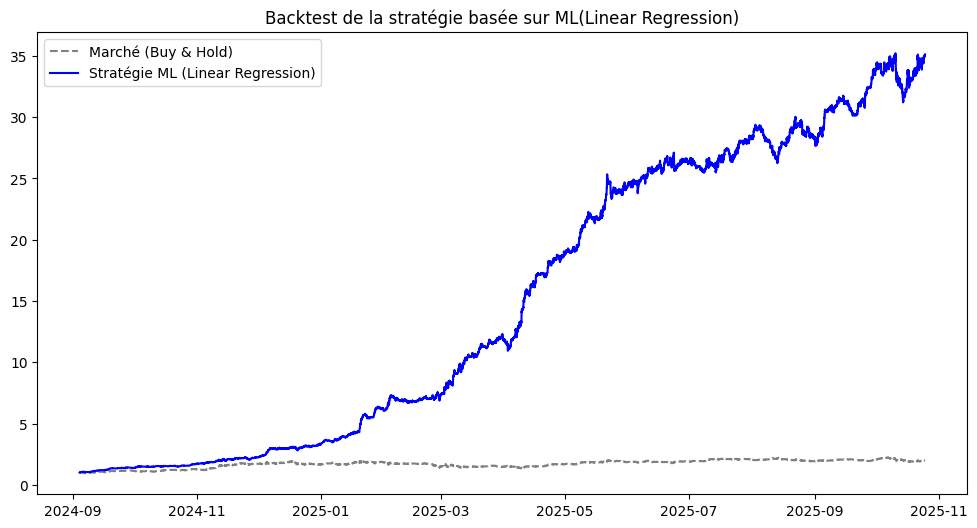

/tmp/ipykernel_14786/212249230.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["future_return"] = df["close"].shift(-1).pct_change()


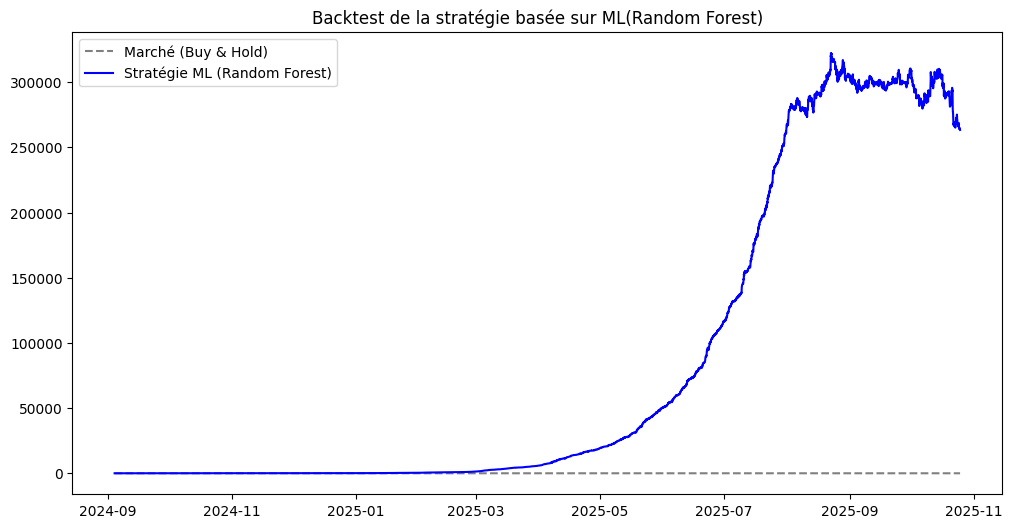

/tmp/ipykernel_14786/212249230.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["future_return"] = df["close"].shift(-1).pct_change()


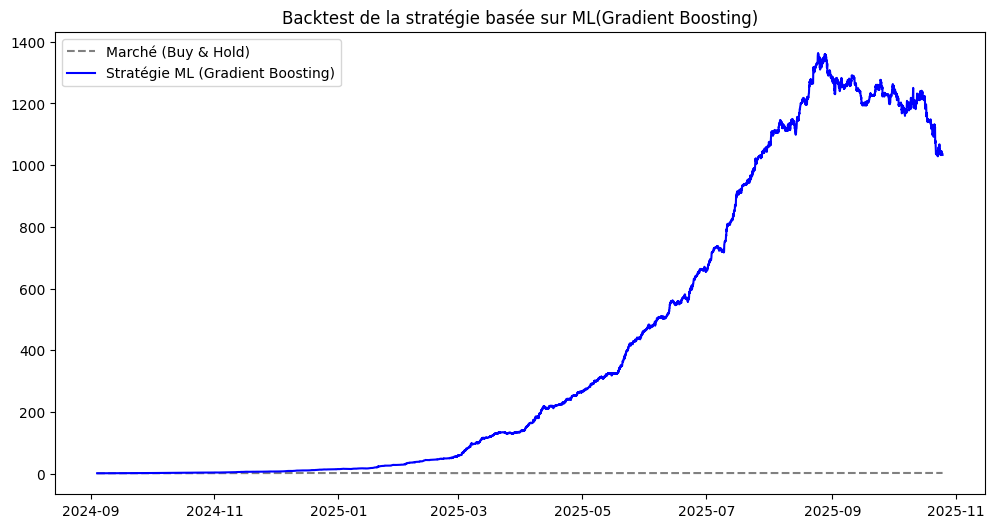

/tmp/ipykernel_14786/212249230.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["future_return"] = df["close"].shift(-1).pct_change()


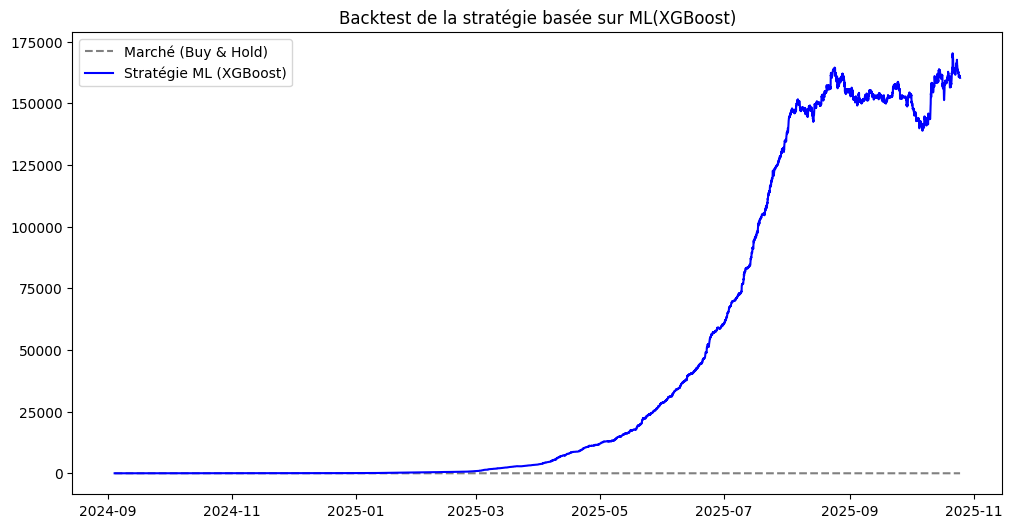

In [13]:
import matplotlib.pyplot as plt
import numpy as np
best_model = models[best_model_name]

for name,model in models.items():
    df["pred"] = model.predict(scaler.transform(X))
    
    # Générer un signal d'achat (1) si le prix prévu > prix actuel
    df["signal"] = np.where(df["pred"] > df["close"], 1, -1)
    
    # Calculer les rendements réels
    df["future_return"] = df["close"].shift(-1).pct_change()
    
    # Calcul du rendement de la stratégie
    df["strategy_return"] = df["signal"] * df["future_return"]
    
    # Backtest cumulatif
    df["cum_market"] = (1 + df["future_return"]).cumprod()
    df["cum_strategy"] = (1 + df["strategy_return"]).cumprod()
    plt.figure(figsize=(12,6))
    plt.plot(df["cum_market"], label="Marché (Buy & Hold)", color="gray", linestyle="--")
    plt.plot(df["cum_strategy"], label=f"Stratégie ML ({name})", color="blue")
    plt.title(f"Backtest de la stratégie basée sur ML({name})")
    plt.legend()
    plt.show()


/tmp/ipykernel_14786/2553692499.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["future_return"] = df["close"].shift(-1).pct_change()
